## Assignment 5 - Neural Networks
### CS450 Fall 2022

This assignment contains 3 problems. 
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.


STEP 0
*COPY NOTEBOOK TO YOUR DRIVE*

Student Name: Maxine Mayor
<br>If you used pair programming..
<br>Programming Partner:


### Problem 1 - MNIST Data Set (10 points)
* Use the MNIST dataset to classify the type of apparel using an artificial nueral network.
* https://www.kaggle.com/zalando-research/fashionmnist
* You may use the library of your choosing
* We went over this is class, so this is an easy one to get you started.
* Grading criteria: Your results on the test data should exceed 0.80 accuracy and you have some explaination about the model.


In [187]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1)

In [188]:
### You code here
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))

model.add(tf.keras.layers.Dropout(0.2))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.fit(X_train, y_train, epochs = 5)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5296 - sparse_categorical_accuracy: 0.8127
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3998 - sparse_categorical_accuracy: 0.8565
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3652 - sparse_categorical_accuracy: 0.8665
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3470 - sparse_categorical_accuracy: 0.8733
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3532 - sparse_categorical_accuracy: 0.8729


In [191]:
print("Test Accuracy",test_accuracy)

Test Accuracy 0.8729000091552734


Provide an explanation on how you picked the initial parameters:



*   28 * 28 = 784 = input shape
*   output layer = # of units as our classes = 10
* reLu activation = arbitrary number for our neruons



### Problem 2 - Poker Hand Classification (30 points)
* Use the Pokerhand dataset at https://archive.ics.uci.edu/ml/machine-learning-databases/poker/
* Pay attention to class distribution.
  * Do you need to do anything to balance the data? 
* How does it affect ANNs if the training data is ordered?
* I mentioned early stopping in class but didn't go into detail. Implement early stopping in your model
  * This article provides an example of early stopping with Keras and Tensorflow 
  * https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
  * Provide a visualization of training and cross validation loss at each epoch
* Provide a confusion matrix and F1 score for the test data
* The output of the model will be probabilities of each class. I like to use np.argmax to get the most probable class, but you may use other techniques.

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [193]:
# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data', header=None)

# Rename the columns
df.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']

In [194]:
# Balance the data by oversampling the minority classes
df_0 = resample(df[df['class']==0], replace=True, n_samples=8000, random_state=1)
df_1 = resample(df[df['class']==1], replace=True, n_samples=8000, random_state=1)
df_2 = resample(df[df['class']==2], replace=True, n_samples=8000, random_state=1)
df_3 = resample(df[df['class']==3], replace=True, n_samples=8000, random_state=1)
df_4 = resample(df[df['class']==4], replace=True, n_samples=8000, random_state=1)
df_5 = resample(df[df['class']==5], replace=True, n_samples=8000, random_state=1)
df_6 = resample(df[df['class']==6], replace=True, n_samples=8000, random_state=1)
df_7 = resample(df[df['class']==7], replace=True, n_samples=8000, random_state=1)
df_8 = resample(df[df['class']==8], replace=True, n_samples=8000, random_state=1)
df_9 = resample(df[df['class']==9], replace=True, n_samples=8000, random_state=1)

# Combine the oversampled dataframes
df_balanced = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9])

In [195]:
# Shuffle the data
df_shuffled = df_balanced.sample(frac=1, random_state=1)

In [196]:
y = onehot_df['Label']
X = onehot_df.loc[:, onehot_df.columns != 'Label']

#shuffle X and y
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [197]:
# Split the data into train, validation, and test sets
X = df_shuffled.iloc[:, :-1].values
y = df_shuffled.iloc[:, -1].values
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [198]:
# Normalize the features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

In [199]:
# Define the neural network model
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [200]:
# Implement early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/100
1600/1600 [==============================] - 5s 3ms/step - loss: 1.2851 - accuracy: 0.5215 - val_loss: 0.9635 - val_accuracy: 0.6331
Epoch 2/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8732 - accuracy: 0.6575 - val_loss: 0.7896 - val_accuracy: 0.6841
Epoch 3/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.7537 - accuracy: 0.6909 - val_loss: 0.7077 - val_accuracy: 0.7087
Epoch 4/100
1600/1600 [==============================] - 4s 3ms/step - loss: 0.6928 - accuracy: 0.7101 - val_loss: 0.6713 - val_accuracy: 0.7105
Epoch 5/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6550 - accuracy: 0.7209 - val_loss: 0.6309 - val_accuracy: 0.7270
Epoch 6/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6286 - accuracy: 0.7272 - val_loss: 0.6079 - val_accuracy: 0.7335
Epoch 7/100
1600/1600 [==============================] - 4s 2ms/step - loss: 0.6089 - accuracy: 0.7328 - val_loss: 0.5944 - val_ac

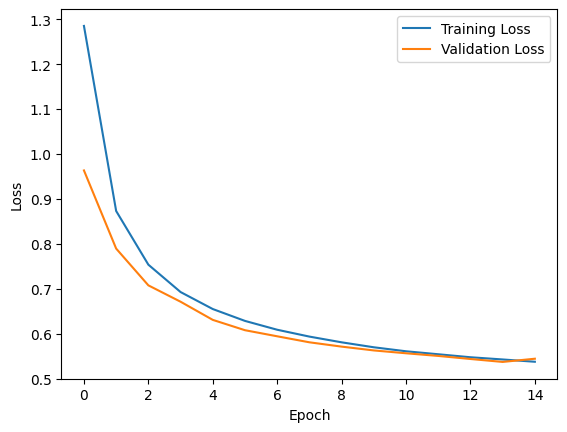

In [201]:
# Plot the training and validation loss at each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [202]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

500/500 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7452
Test Loss: 0.5469728112220764
Test Accuracy: 0.7452499866485596


In [203]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix and F1 score for the test set
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Confusion Matrix:\n', cm)
print('F1 Score:', f1)

500/500 [==============================] - 1s 1ms/step
Confusion Matrix:
 [[ 596  713   39  200   14    5   13    0    0    0]
 [ 432  683   81  272   45    3   12    2    0    0]
 [ 349  640  172  359   45    0    6    0    0    0]
 [ 187  524  108  785   27    0    0    0    0    0]
 [   0    0    0    0 1615    0    0    0    0    0]
 [   0    0    0    0    0 1607    0    0    0    0]
 [   0    0    0    0    0    0 1649    0    0    0]
 [   0    0    0    0    0    0    0 1569    0    0]
 [   0    0    0    0    0    0    0    0 1611    0]
 [   0    0    0    0    0    0    0    0    0 1637]]
F1 Score: 0.7360970404364001


* Explain how you picked the number of nodes and the 
number of hidden layers.
* Explain your data cleaning and fearture engineering tasks.


number of hidden layers = 2/3(input layer) + size of output layer


number of nodes = number of samples/(number of input neurons + number of output neurons)

Cleaning and feature engineering:
*   One hot encoding: categorical data are converted into numerical data
*   Normalization: transform features to be on a similar scale. This improves the performance and training stability of the model.
*   Shuffling: shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.
*   Oversampling: Oversampled minority classes to fix imbalanced data










### Problem 3 - Parkinson's Telemonitoring (30 points)
* In class, we focused on artificial nueral networks for classification purposes
* Use the data set at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/
   * The goal is to predict the 'motor_UPDRS' 
   * Remove the 'total_UPDRS' column. The goal of the data set author is to predict both and 'total_UPDRS' but I don't want to have two predicted variables. 
  * I also don't want to use it as a predictor because 'total_UPDRS' will be too colinear with 'motor_UPDRS' 
* In this example, we want to use a regression ANN
* Use a 80/20 train test split for your model
* I acknowledge that you can solve this without an ANN, but please use a regression ANN
  * Make sure you look at fields that are numbers but are not truly ordinal. How would you handle them?
* This article provides an overview of regression ANN using Tensorflow. 
  * https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [205]:
# Load the data from the UCI ML repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
data = pd.read_csv(url)

# Drop the 'total_UPDRS' column
data = data.drop(['total_UPDRS'], axis=1)

In [206]:
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [207]:
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,class
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [208]:
# Split the data into input (X) and output (Y) variables
X = data.drop(['motor_UPDRS'], axis=1).values
Y = data['motor_UPDRS'].values

In [209]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #80/20 train test split

In [210]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [211]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='linear'))

In [212]:
# Compile the model with mean squared error as the loss function and Adam optimizer
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [213]:
# Fit the model to the training data
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 442.9103 - mse: 442.9103 - mae: 19.2636 - val_loss: 332.1279 - val_mse: 332.1279 - val_mae: 16.1135
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 262.7439 - mse: 262.7439 - mae: 13.9066 - val_loss: 190.4855 - val_mse: 190.4855 - val_mae: 11.4789
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 161.9700 - mse: 161.9700 - mae: 10.3547 - val_loss: 123.6543 - val_mse: 123.6543 - val_mae: 8.9703
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 106.7542 - mse: 106.7542 - mae: 8.2277 - val_loss: 86.2545 - val_mse: 86.2545 - val_mae: 7.5640
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 80.5552 - mse: 80.5552 - mae: 7.2203 - val_loss: 70.9461 - val_mse: 70.9461 - val_mae: 6.8961
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 68.7633 - mse: 68.7633 - mae: 6.7223 - val_loss: 62.5313 - va

In [214]:
# Evaluate the model on the testing data
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score)

# Predict the motor_UPDRS scores for the testing data
Y_pred = model.predict(X_test)

# Print the first 10 actual and predicted motor_UPDRS scores
print("Actual motor_UPDRS:", Y_test[:10])
print("Predicted motor_UPDRS:", Y_pred[:10].flatten())

Test loss: [10.724841117858887, 10.724841117858887, 2.4784886837005615]
37/37 [==============================] - 0s 2ms/step
Actual motor_UPDRS: [33.084   7.1599 11.218  12.759  25.391  18.     11.484  25.236  17.928
 28.092 ]
Predicted motor_UPDRS: [27.45107   6.862159 13.349633 12.080522 23.629456 16.549402 10.711697
 25.454956 16.409164 27.420958]


Plot the history of the training validation data loss. 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


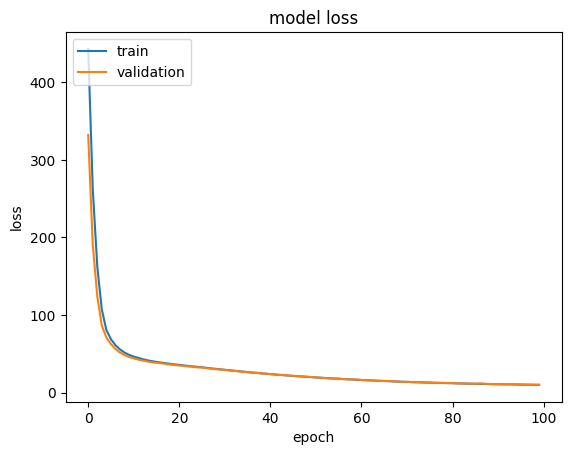

In [215]:
#Plot history of loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Based on the history, how many epochs do you think you should have used while training the model? 

As the number of epochs increase, the loss for the training set and the loss for the test data decreases. That means the accuracy increases with a higher epoch. I would probably do it with 200+ epochs.

For regression problems, we can measure residuals to guage accurancy. Plot a residuals graph and explain how you interpret it.

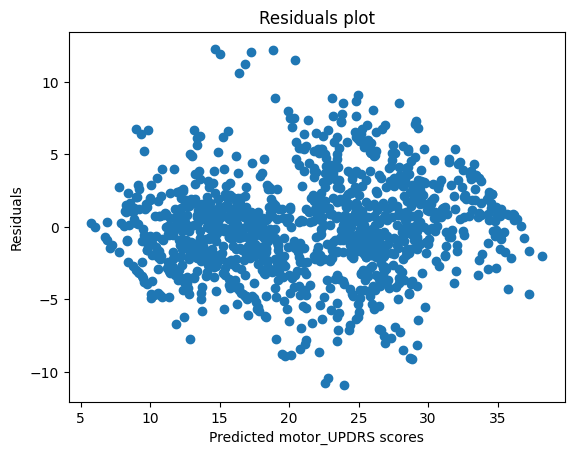

In [216]:
# Calculate the residuals between the predicted and actual motor_UPDRS scores
residuals = Y_test - Y_pred.flatten()

# Plot the residuals against the predicted motor_UPDRS scores
plt.scatter(Y_pred.flatten(), residuals)
plt.xlabel("Predicted motor_UPDRS scores")
plt.ylabel("Residuals")
plt.title("Residuals plot")
plt.show()

Intepretation of residual plot:


All the residuals except for one outlier is within a 10 deviation with the majority of the data sitting along y = 0 which indicates good residuals.